The house price data of King County was collected from kaggle.
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
It includes  'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15' and other data columns.
Combined with the python analysis tool learned recently, the possible factors affecting house prices were analyzed.
For example，what is the relationship between house price and house size?
What is the relationship between house price and housing rating?
......
Taking price as dependent variable Y,  sqft_living and grade as independent Xs，I will try to find their direct correlation through data analysis.


In [61]:
#read dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
house_price=pd.read_csv('kc_house_data.csv')
 
#Show all data columns
house_price.columns



Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [31]:
#select the price, grade and condition
price_grade_size = house_price.loc[house_price.index[:], ['price', 'sqft_living','grade']]
price_grade_size


,price,sqft_living,grade
0,221900.0,1180,7
1,538000.0,2570,7
2,180000.0,770,6
3,604000.0,1960,7
4,510000.0,1680,8
...,...,...,...
21608,360000.0,1530,8
21609,400000.0,2310,8
21610,402101.0,1020,7
21611,400000.0,1600,8


In [39]:
#Judge whether there is missing data
price_grade_size.isnull().any(axis=0)

price          False
sqft_living    False
grade          False
dtype: bool

In [33]:
#Descriptive statistics of the new table
price_grade_size.describe()

,price,sqft_living,grade
count,2.161300e+04,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,7.656873
std,3.671272e+05,918.440897,1.175459
min,7.500000e+04,290.000000,1.000000
25%,3.219500e+05,1427.000000,7.000000
50%,4.500000e+05,1910.000000,7.000000
75%,6.450000e+05,2550.000000,8.000000
max,7.700000e+06,13540.000000,13.000000


In [51]:
#Perform group by descriptive statistics on the new table
price_grade_size.groupby('grade').describe()

price                                                               \
        count          mean           std        min        25%        50%   
grade                                                                        
1         1.0  1.420000e+05           NaN   142000.0   142000.0   142000.0   
3         3.0  2.056667e+05  1.135180e+05    75000.0   168500.0   262000.0   
4        29.0  2.143810e+05  9.430617e+04    80000.0   145000.0   205000.0   
5       242.0  2.485240e+05  1.181003e+05    78000.0   175000.0   228700.0   
6      2038.0  3.019196e+05  1.229703e+05    82000.0   215037.5   275276.5   
7      8981.0  4.025903e+05  1.558769e+05    90000.0   285000.0   375000.0   
8      6068.0  5.428528e+05  2.174734e+05   140000.0   390000.0   510000.0   
9      2615.0  7.735132e+05  3.161201e+05   230000.0   571500.0   720000.0   
10     1134.0  1.071771e+06  4.835451e+05   316000.0   768087.5   914327.0   
11      399.0  1.496842e+06  7.050993e+05   420000.0  1036000.0  1284000.0   
12       90.0  2.191222e+06  1.027819e+06   835000.0  1500000.0  1817500.0   
13       13.0  3.709615e+06  1.859450e+06  1780000.0  2415000.0  2983000.0   

                            sqft_living                                    \
             75%        max       count         mean          std     min   
grade                                                                       
1       142000.0   142000.0         1.0   290.000000          NaN   290.0   
3       271000.0   280000.0         3.0   596.666667    75.055535   520.0   
4       265000.0   435000.0        29.0   660.482759   229.414569   384.0   
5       295750.0   795000.0       242.0   983.326446   359.771684   370.0   
6       366837.5  1200000.0      2038.0  1191.561335   396.782633   390.0   
7       485000.0  2050000.0      8981.0  1689.400401   510.151960   550.0   
8       640000.0  3070000.0      6068.0  2184.748517   595.899429   750.0   
9       880000.0  2700000.0      2615.0  2868.139962   664.151007   860.0   
10     1250000.0  3600000.0      1134.0  3520.299824   756.915126  1180.0   
11     1700000.0  7062500.0       399.0  4395.448622   986.219028  2370.0   
12     2668500.0  5350000.0        90.0  5471.588889  1529.175117  3690.0   
13     3800000.0  7700000.0        13.0  7483.076923  2097.694705  4500.0   

                                         
           25%     50%     75%      max  
grade                                    
1       290.00   290.0   290.0    290.0  
3       560.00   600.0   635.0    670.0  
4       480.00   660.0   760.0   1470.0  
5       720.00   905.0  1167.5   2040.0  
6       900.00  1120.0  1397.5   3900.0  
7      1320.00  1630.0  1990.0   4480.0  
8      1760.00  2150.0  2550.0   5370.0  
9      2440.00  2820.0  3240.0   6900.0  
10     3020.00  3450.0  3930.0   6630.0  
11     3750.00  4260.0  4960.0  10040.0  
12     4463.75  4965.0  6377.5  13540.0  
13     6330.00  7100.0  8670.0  12050.0

In [52]:
#Perform group by descriptive statistics on the new table
price_grade_size.groupby('sqft_living').describe()

price                                                           \
            count       mean          std        min        25%        50%   
sqft_living                                                                  
290           1.0   142000.0          NaN   142000.0   142000.0   142000.0   
370           1.0   276000.0          NaN   276000.0   276000.0   276000.0   
380           1.0   245000.0          NaN   245000.0   245000.0   245000.0   
384           1.0   265000.0          NaN   265000.0   265000.0   265000.0   
390           2.0   236500.0  12020.81528   228000.0   232250.0   236500.0   
...           ...        ...          ...        ...        ...        ...   
9640          1.0  4668000.0          NaN  4668000.0  4668000.0  4668000.0   
9890          1.0  6885000.0          NaN  6885000.0  6885000.0  6885000.0   
10040         1.0  7062500.0          NaN  7062500.0  7062500.0  7062500.0   
12050         1.0  7700000.0          NaN  7700000.0  7700000.0  7700000.0   
13540         1.0  2280000.0          NaN  2280000.0  2280000.0  2280000.0   

                                  grade                                    \
                   75%        max count  mean       std   min   25%   50%   
sqft_living                                                                 
290           142000.0   142000.0   1.0   1.0       NaN   1.0   1.0   1.0   
370           276000.0   276000.0   1.0   5.0       NaN   5.0   5.0   5.0   
380           245000.0   245000.0   1.0   5.0       NaN   5.0   5.0   5.0   
384           265000.0   265000.0   1.0   4.0       NaN   4.0   4.0   4.0   
390           240750.0   245000.0   2.0   5.0  1.414214   4.0   4.5   5.0   
...                ...        ...   ...   ...       ...   ...   ...   ...   
9640         4668000.0  4668000.0   1.0  12.0       NaN  12.0  12.0  12.0   
9890         6885000.0  6885000.0   1.0  13.0       NaN  13.0  13.0  13.0   
10040        7062500.0  7062500.0   1.0  11.0       NaN  11.0  11.0  11.0   
12050        7700000.0  7700000.0   1.0  13.0       NaN  13.0  13.0  13.0   
13540        2280000.0  2280000.0   1.0  12.0       NaN  12.0  12.0  12.0   

                         
              75%   max  
sqft_living              
290           1.0   1.0  
370           5.0   5.0  
380           5.0   5.0  
384           4.0   4.0  
390           5.5   6.0  
...           ...   ...  
9640         12.0  12.0  
9890         13.0  13.0  
10040        11.0  11.0  
12050        13.0  13.0  
13540        12.0  12.0  

[1038 rows x 16 columns]

In [60]:
#Group statistics on the relationship between price and grade/sqft_living
price_grade_size.groupby('grade').agg({'price':'mean'})
price_grade_size.groupby('sqft_living').agg({'price':'mean'})

,price
sqft_living,
290,142000.0
370,276000.0
380,245000.0
384,265000.0
390,236500.0
...,...
9640,4668000.0
9890,6885000.0
10040,7062500.0


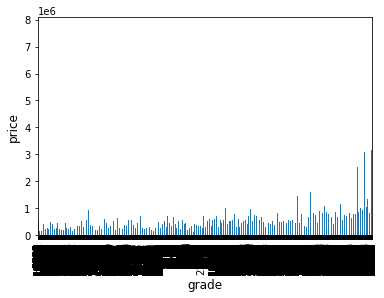

In [69]:
sorted_pgc = price_grade_size.sort_values(by='grade', ascending=True)
# sorted_pgc
ax = sorted_pgc['price'].plot(kind='bar')
ax.set_xlabel('grade', fontsize=12)
ax.set_ylabel('price', fontsize=12)
plt.show()

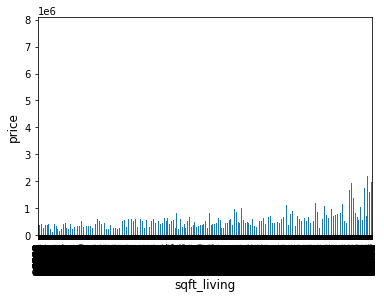

In [70]:
sorted_pgc1 = price_grade_size.sort_values(by='sqft_living', ascending=True)
# sorted_pgc1
ax = sorted_pgc1['price'].plot(kind='bar')
ax.set_xlabel('sqft_living', fontsize=12)
ax.set_ylabel('price', fontsize=12)
plt.show()

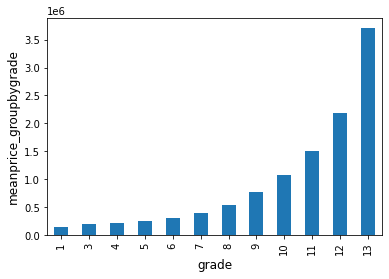

In [71]:
meanprice_groupbygrade = price_grade_size.groupby('grade').agg({'price':'mean'})
ax = meanprice_groupbygrade['price'].plot(kind='bar')
ax.set_xlabel('grade', fontsize=12)
ax.set_ylabel('meanprice_groupbygrade', fontsize=12)
plt.show()

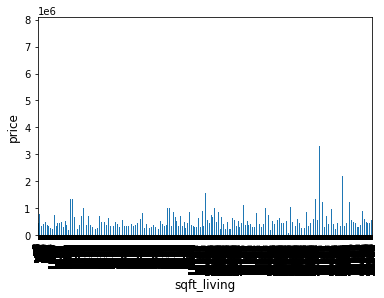

In [68]:
meanprice_groupbylivingspace = price_grade_size.groupby('sqft_living').agg({'price':'mean'})
ax = price_grade_size['price'].plot(kind='bar')
ax.set_xlabel('sqft_living', fontsize=12)
ax.set_ylabel('price', fontsize=12)
plt.show()